## Corona cases and deaths for Germany

data from https://npgeo-corona-npgeo-de.hub.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0

In [167]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [180]:
start_date = datetime(2020, 3, 1)
end_date = datetime(2020, 3, 24)

raw_dfs = [
    pd.read_csv('RKI_COVID19_2020-03-21_10h.csv', parse_dates=['Meldedatum']),
    pd.read_csv('RKI_COVID19_2020-03-23_16h.csv', parse_dates=['Meldedatum', 'Datenstand']),
    pd.read_csv('RKI_COVID19_2020-03-24_10h.csv', parse_dates=['Meldedatum', 'Datenstand']),
    pd.read_csv('RKI_COVID19_2020-03-25_22h.csv', parse_dates=['Meldedatum', 'Datenstand'])
]
raw_dfs[0]['Datenstand'] = datetime(2020, 3, 21)

dfs = []
for df_raw in raw_dfs:
    df = df_raw.copy()
    df['Meldedatum'] = df['Meldedatum'].dt.tz_localize(None)
    df['Datenstand'] = df['Datenstand'].dt.tz_localize(None)
    df['IdLandkreis'] = df['IdLandkreis'].replace('0-1', 0).astype(int)
    df = df.query('Meldedatum > @start_date' 
                  ' and Meldedatum <= @end_date')
    dfs.append(df)
df[:3]

,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,ObjectId,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall
0,3,Niedersachsen,LK Hameln-Pyrmont,A15-A34,M,3,0,221614,2020-03-16,3252,2020-03-25,0,0
1,3,Niedersachsen,LK Hameln-Pyrmont,A15-A34,M,1,0,221615,2020-03-18,3252,2020-03-25,0,0
2,3,Niedersachsen,LK Hameln-Pyrmont,A15-A34,W,1,0,221616,2020-03-20,3252,2020-03-25,0,0


In [181]:
merge_cols = ['IdBundesland', 'Bundesland', 'Landkreis', 'Altersgruppe', 'Geschlecht', 'AnzahlFall', 'AnzahlTodesfall', 'Meldedatum', 'IdLandkreis']
df_merge = dfs[0]
for df in dfs[1:]:
    df_merge = df_merge.merge(df, how='right', on=merge_cols)
    for col in ['Datenstand', 'ObjectId']:
        df_merge[col] = df_merge[[col + '_x', col + '_y']].min(axis=1)
        del df_merge[col + '_x']
        del df_merge[col + '_y']

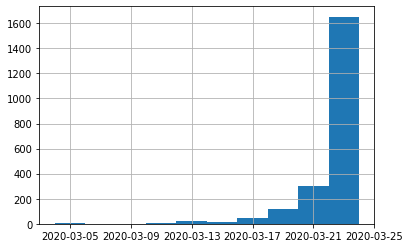

In [182]:
df_merge[df_merge['Datenstand'] == datetime(2020, 3, 25)]['Meldedatum'].hist()

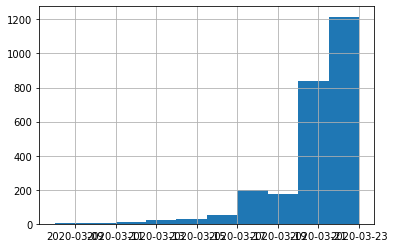

In [183]:
df_merge[df_merge['Datenstand'] == datetime(2020, 3, 24)]['Meldedatum'].hist()

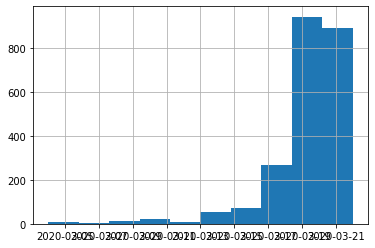

In [184]:
df_merge[df_merge['Datenstand'] == datetime(2020, 3, 23)]['Meldedatum'].hist()